In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pcla_2020 = pd.read_csv('PCLA_2020.csv')

In [3]:
pcla_2020.head()

,emailName,subjectLine,category,sentCount,scheduledDateTimestamp,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
0,YEAR IN REVIEW,PENN CLUB OF LA: YEAR IN REVIEW,General Information,1522,2020-12-22 09:58:40-10:00,1521,99.93430,1,0.06570,1169,76.85733,625,41.09139,27,1.77515,25,4.00000,23,3.68000,5,0.32873,0,0.00000,0,0.0,9
1,Dedicated Email Blast Vaccines in the Age of M...,Join PCLA for Vaccines In the Age of Misinform...,General Information,7585,2020-11-24 08:00:00-10:00,7548,99.51219,37,0.48780,4781,63.34129,2347,31.09433,159,2.10652,117,4.98509,108,4.60162,78,1.03339,17,0.22523,0,0.0,9
2,Dedicated Email Blast Vaccines in the Age of M...,Vaccines In the Age of Misinformation - Decemb...,General Information,1575,2020-11-18 08:00:00-10:00,1575,100.00000,0,0.00000,1295,82.22222,600,38.09524,46,2.92063,41,6.83333,39,6.50000,31,1.96825,3,0.19048,0,0.0,9
3,Second Dedicated Email Blast for yPenn Welcome...,"Welcome to LA Event This Thursday, Meet Your y...",General Information,1071,2020-10-20 11:30:38-10:00,1070,99.90663,1,0.09337,879,82.14954,449,41.96262,54,5.04673,47,10.46771,45,10.02227,4,0.37383,1,0.09346,0,0.0,9
4,Dedicated Email Blast for yPenn Welcome to LA,New to LA? Join Us for a 'Welcome to LA' Round...,General Information,1097,2020-10-08 05:00:00-10:00,1097,100.00000,0,0.00000,825,75.20511,435,39.65360,43,3.91978,39,8.96552,39,8.96552,22,2.00547,3,0.27347,0,0.0,9


In [4]:
df_20 = pcla_2020.drop(columns=['spamReport', 'category','spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName','deliveredPercent', 'unsubscribesPercent','sentCount', 'initialClicks', 'initialClicksPercent', 'conversionsPercent', 'opensPercent','uniqueOpensPercent','clicksPercent','uniqueClicksPercent', 'unsubscribes'])
df_20.head()

,subjectLine,scheduledDateTimestamp,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,PENN CLUB OF LA: YEAR IN REVIEW,2020-12-22 09:58:40-10:00,1521,1169,625,27,25,5
1,Join PCLA for Vaccines In the Age of Misinform...,2020-11-24 08:00:00-10:00,7548,4781,2347,159,117,78
2,Vaccines In the Age of Misinformation - Decemb...,2020-11-18 08:00:00-10:00,1575,1295,600,46,41,31
3,"Welcome to LA Event This Thursday, Meet Your y...",2020-10-20 11:30:38-10:00,1070,879,449,54,47,4
4,New to LA? Join Us for a 'Welcome to LA' Round...,2020-10-08 05:00:00-10:00,1097,825,435,43,39,22


In [5]:
df_20 = df_20.dropna()
#df_19.set_index('subjectLine', inplace = True)

In [6]:
timeStamp = df_20['scheduledDateTimestamp']
print(timeStamp)

0     2020-12-22 09:58:40-10:00
1     2020-11-24 08:00:00-10:00
2     2020-11-18 08:00:00-10:00
3     2020-10-20 11:30:38-10:00
4     2020-10-08 05:00:00-10:00
5     2020-10-04 13:48:25-10:00
6     2020-09-29 08:26:15-10:00
7     2020-09-20 10:38:11-10:00
8     2020-09-09 10:31:44-10:00
9     2020-09-09 08:00:00-10:00
10    2020-08-26 14:53:56-10:00
11    2020-08-20 10:13:57-10:00
12    2020-08-09 13:00:00-10:00
13    2020-08-06 06:12:51-10:00
14    2020-08-03 18:31:01-10:00
15    2020-08-02 16:58:33-10:00
16    2020-07-31 07:00:00-10:00
17    2020-07-28 13:00:00-10:00
18    2020-07-23 12:00:00-10:00
19    2020-07-14 05:50:00-10:00
20    2020-07-13 05:56:51-10:00
21    2020-07-09 05:00:00-10:00
22    2020-07-07 05:52:28-10:00
23    2020-06-30 10:10:19-10:00
24    2020-06-29 15:00:00-10:00
25    2020-06-28 14:00:00-10:00
26    2020-06-24 10:00:00-10:00
27    2020-06-19 05:55:00-10:00
28    2020-05-28 05:50:00-10:00
29    2020-05-19 13:00:00-10:00
30    2020-04-27 06:29:00-10:00
31    20

In [7]:
days = []
time = []
for index, value in timeStamp.items():
  #print(f"Index : {index}, Value : {value}")
  splitStamp = value.split(' ')
  #print(splitStamp)
  dayStamp = pd.to_datetime(splitStamp[0]).dayofweek
  days.append(dayStamp)
  time_stamp = int(splitStamp[1].split('-')[0].split(':')[0])
  time.append(time_stamp)

print(days)
print("=========")
print(time)

[1, 1, 2, 1, 3, 6, 1, 6, 2, 2, 2, 3, 6, 3, 0, 6, 4, 1, 3, 1, 0, 3, 1, 1, 0, 6, 2, 4, 3, 1, 0, 2, 6, 2, 2, 6, 0, 1, 1, 1, 2, 3, 3, 3, 0, 1, 1, 4]
[9, 8, 8, 11, 5, 13, 8, 10, 10, 8, 14, 10, 13, 6, 18, 16, 7, 13, 12, 5, 5, 5, 5, 10, 15, 14, 10, 5, 5, 13, 6, 11, 15, 6, 6, 6, 10, 11, 10, 6, 6, 22, 10, 10, 9, 10, 7, 22]


In [8]:
#New Model - DAY OF WEEK VS CONVERSIONS 
new_x = days
new_y = df_20['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

#Monday
print("Monday conversions expectation: ", regressor.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor.predict([[6]]))

Monday conversions expectation:  [7.65681445]
Tuesday conversions expectation:  [8.80500821]
Wednesday conversions expectation:  [9.95320197]
Thursday conversions expectation:  [11.10139573]
Friday conversions expectation:  [12.24958949]
Saturday conversions expectation:  [13.39778325]
Sunday conversions expectation:  [14.54597701]


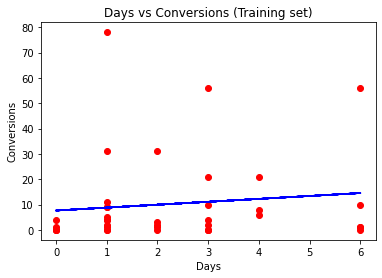

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Days vs Conversions (Training set)')
plt.xlabel('Days')
plt.ylabel('Conversions')
plt.show()

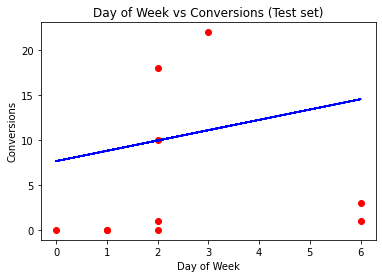

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Day of Week vs Conversions (Test set)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [14]:
df_20.describe()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1735.437500,1313.395833,648.729167,77.479167,62.333333,9.312500
std,1607.982004,926.601885,467.922968,71.096575,54.891124,16.382601
min,33.000000,127.000000,26.000000,0.000000,0.000000,0.000000
25%,1575.000000,1058.250000,524.250000,39.750000,31.250000,0.000000
50%,1614.000000,1238.500000,637.000000,62.000000,52.000000,2.500000
75%,1621.000000,1419.250000,700.500000,97.000000,85.250000,10.000000
max,7604.000000,4781.000000,2347.000000,430.000000,325.000000,78.000000


In [16]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subjectLine             48 non-null     object
 1   scheduledDateTimestamp  48 non-null     object
 2   delivered               48 non-null     int64 
 3   opens                   48 non-null     int64 
 4   uniqueOpens             48 non-null     int64 
 5   clicks                  48 non-null     int64 
 6   uniqueClicks            48 non-null     int64 
 7   conversions             48 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.4+ KB


In [17]:
df_20.corr()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
delivered,1.000000,0.966121,0.979814,0.655946,0.639728,0.734421
opens,0.966121,1.000000,0.987492,0.718235,0.702516,0.726650
uniqueOpens,0.979814,0.987492,1.000000,0.674465,0.662999,0.709518
clicks,0.655946,0.718235,0.674465,1.000000,0.995641,0.341464
uniqueClicks,0.639728,0.702516,0.662999,0.995641,1.000000,0.317069
conversions,0.734421,0.726650,0.709518,0.341464,0.317069,1.000000


In [19]:
#Model Time of Day vs Conversions
new_x = time
new_y = df_20['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

#Predict Time
print("12 pm conversions expectation: ", regressor.predict([[12]]))
print("9 am conversions expectation: ", regressor.predict([[9]]))
print("5 pm conversions expectation: ", regressor.predict([[17]]))
print("3 pm conversions expectation: ", regressor.predict([[15]]))

12 pm conversions expectation:  [9.25077628]
9 am conversions expectation:  [10.80733402]
5 pm conversions expectation:  [6.65651338]
3 pm conversions expectation:  [7.69421854]


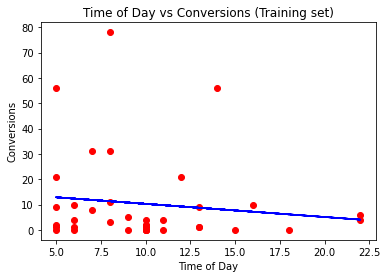

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Training set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()

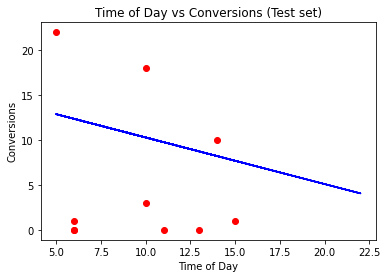

In [23]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Test set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()